In [418]:
#import all libraries
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


Get the data ready

## Data preperation

In [419]:
pre_df = pd.read_csv('Telco_Customer_Churn.csv')

In [420]:
pre_df.head(10000)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [421]:
pre_df[pre_df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [422]:
pre_df.drop_duplicates(inplace = True)

In [423]:
pre_df.shape

(7043, 21)

In [424]:
# remove missing values
pre_df.dropna(inplace = True)

In [425]:
pre_df.shape

(7043, 21)

In [426]:
# remove customer ID
df = pre_df.iloc[:,1:]

In [427]:
#Which different values does the 
col_head = list(df.columns)

In [428]:
df[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [429]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors= 'coerce')

In [430]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [431]:
df[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [432]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [433]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## cleanup for better classification for with yes and

In [434]:
#Multiple lines, Online Security, Online Backup, Device Protection, Tech support, Streaming Service, Streaming Movies, 
df['MultipleLines'] = df['MultipleLines'].replace("No phone service", "No")
df['OnlineSecurity'] = df['OnlineSecurity'].replace("No internet service", "No")
df['OnlineBackup'] = df['OnlineBackup'].replace("No internet service", "No")
df['DeviceProtection'] = df['DeviceProtection'].replace("No internet service", "No")
df['TechSupport'] = df['TechSupport'].replace("No internet service", "No")
df['StreamingTV'] = df['StreamingTV'].replace("No internet service", "No")
df['StreamingMovies'] = df['StreamingMovies'].replace("No internet service", "No")

#converting senior citizen into category
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1,"Yes")
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0,"No")
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [435]:
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,No,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [436]:
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(
    go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions"
    # Add annotations in the center of the donut pies.
)
fig.show()

In [437]:
# Make barChart


In [438]:
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

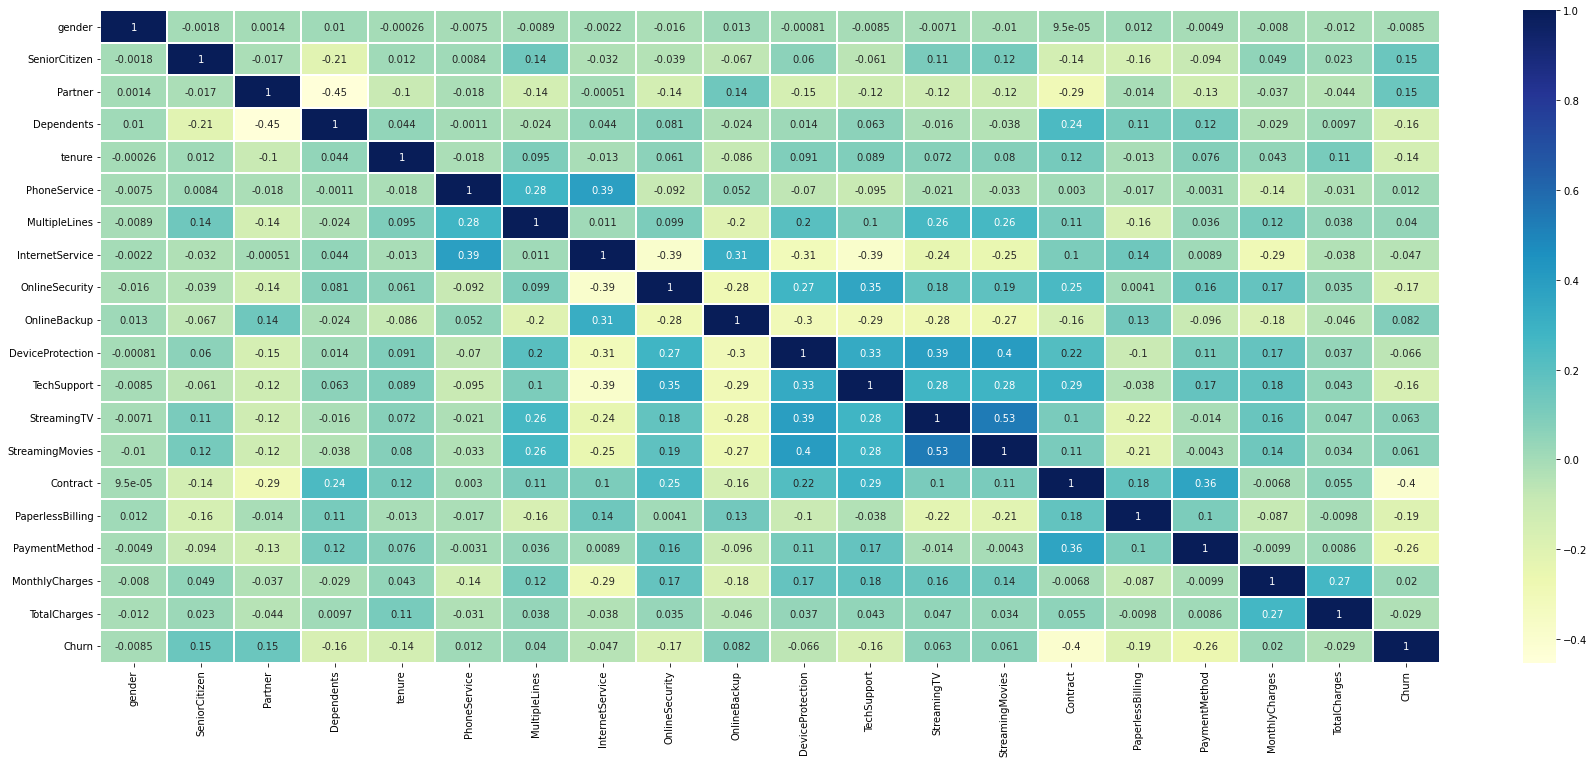

In [439]:
import seaborn as sns

plt.figure(figsize=(30, 12))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot = True)

In [440]:
df.shape

(7032, 20)

In [441]:
# df_new = df.drop(columns=['gender', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'TotalCharges'])

df_new = df.drop(columns=['gender','PhoneService'])

In [442]:
df_new.shape

(7032, 18)

In [443]:
df_new.head(20)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,No,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,No,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,No,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,No,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,No,No,No,8,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,No,No,Yes,22,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,No,No,No,10,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,No,Yes,No,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,No,No,Yes,62,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


## Modeling

### Premodeling

In [444]:
# Remove churn for training
Features = df_new.columns.drop('Churn')

In [445]:
# Prepare split for the training data and the test data
X = df_new[Features]
y = df_new['Churn']

X = pd.get_dummies(X)

In [446]:
X

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


In [447]:
# split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=69
)

In [448]:
# Show how many rows which is associated with the XY Train and XY Test data
arr = [X_train, y_train, X_test, y_test]

for x in arr:
    print(x.shape)

(5274, 35)
(5274,)
(1758, 35)
(1758,)


In [449]:
maxDepth = 3

### Decision trees

In [450]:
# Evaluation with the RFECV to find the most important the features in regard to accurassy 
# Decision tree Classifier for X 

Decision_rfc = DecisionTreeClassifier(max_depth = maxDepth)


rfecv = RFECV(estimator=Decision_rfc, step=1, cv=5, scoring='accuracy')
rfecv.fit(X,y)

#Print results
print('Optimal feature amount: {}',rfecv.n_features_)
print('Chosen features:', list(X.columns[rfecv.support_]))
##print('Importance on chosen features: \n', np.absolute(rfecv.estimator_.coef_))
len(rfecv.grid_scores_)

Optimal feature amount: {} 3
Chosen features: ['tenure', 'InternetService_Fiber optic', 'Contract_Month-to-month']


35

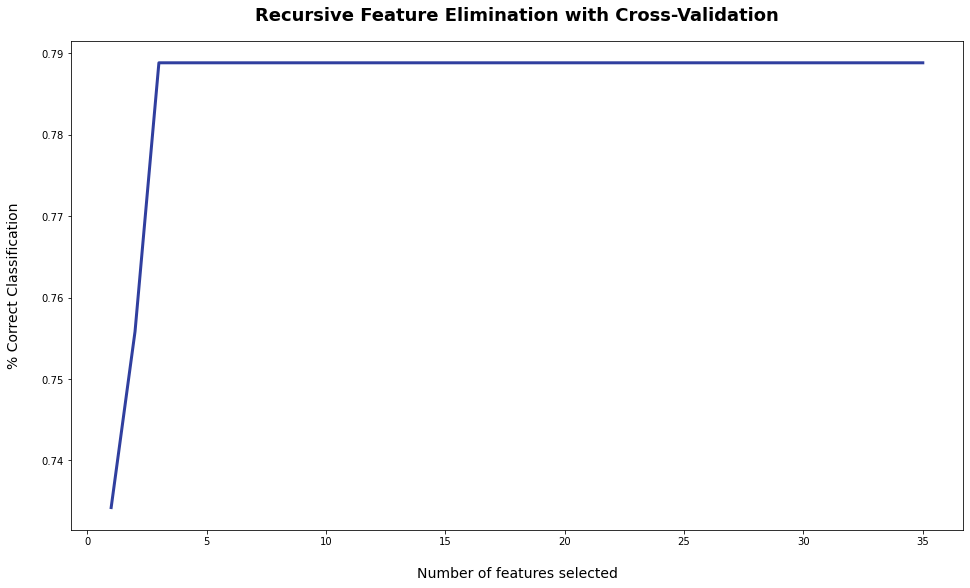

In [451]:


plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [452]:
# Fit the model
# we have played around with the hyperparameter max_depth between the below
#maxDepth = 2
#maxDepth = 3
maxDepth = 3

dtree = DecisionTreeClassifier(max_depth = maxDepth)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [453]:
dot_data = export_graphviz(
    dtree,
    out_file=None,
    feature_names=X.columns,
    class_names=['no','yes'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [454]:
# WE find the 
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1173  108]
 [ 284  193]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1281
           1       0.64      0.40      0.50       477

    accuracy                           0.78      1758
   macro avg       0.72      0.66      0.68      1758
weighted avg       0.76      0.78      0.76      1758



## Logistic regression

In [455]:
df1=df

In [456]:
## Random Forrest

In [457]:
dummy_df = pd.get_dummies(df1)

In [458]:
dummy_df

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


In [459]:
# Establish our target feature, churn, as our y feature
y = dummy_df.Churn.values
# Drop our target feature from our features dataframe
X = dummy_df.drop('Churn', axis = 1)
# Save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [460]:
# Instantiate min-max scaling object
mm = MinMaxScaler()
# Fit and transform our feature dataframe
X = pd.DataFrame(mm.fit_transform(X))
# Reassign column names so new dataframe has corresponding names
X.columns = cols

In [461]:
# Perform train test split from our target feature series and the predicting feature dataframe (set test size to 25% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [462]:
# Instantiate a Logistic Regression model without an intercept. C is set to an arbitrarily large number. Use 'liblinear' solver method.
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [463]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [464]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    4260
1    1014
dtype: int64
----------------------------------
0    0.807736
1    0.192264
dtype: float64


In [465]:
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    1391
1     367
dtype: int64
---------------------------------
0    0.79124
1    0.20876
dtype: float64


In [466]:
#confusion matrix


In [467]:
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1153  147]
 [ 220  238]]


In [472]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)

In [473]:
print(f1_train)
print(f1_test)

0.6138613861386139
0.5646500593119811


In [470]:
print(accuracy_train)

0.8077360637087599


0.519650655021834
